In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset with the correct delimiter
data_path = '../data/raw/data.csv'  # Adjust this path as necessary
df = pd.read_csv(data_path, delimiter=';')  # Specify semicolon as the delimiter

In [2]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

Series([], dtype: int64)


c:\Users\matiwos.desalegn\AppData\Local\miniconda3\envs\student-dropout-prediction\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\matiwos.desalegn\AppData\Local\miniconda3\envs\student-dropout-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


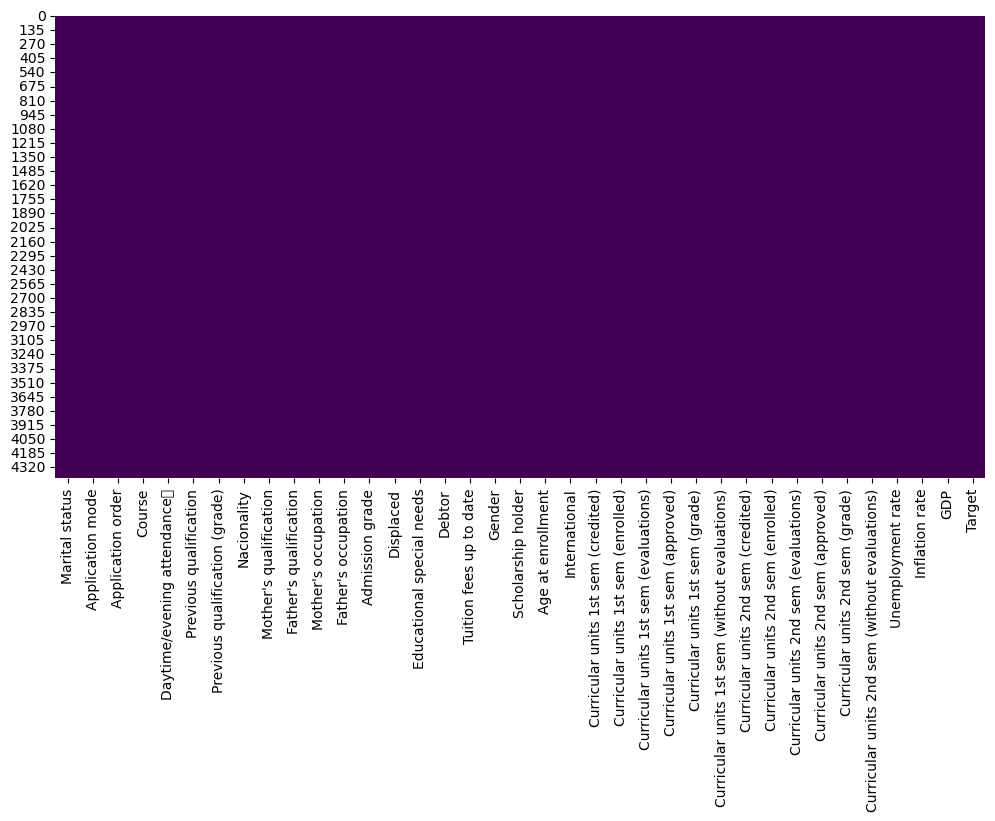

In [4]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [5]:
# Strip any whitespace or tab characters from column names
df.columns = df.columns.str.replace('\t', '')

# Check if the column has been renamed properly
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [8]:
# Define numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR
def detect_outliers(df, num_cols):
    outliers = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers[col] = outliers_in_col
    
    return outliers

# Detect outliers in the numerical columns
outliers_dict = detect_outliers(df, num_cols)

# Display the outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:\n{outliers}\n")

Outliers in Marital status:
4       2
5       2
38      4
56      2
65      4
       ..
4400    2
4404    2
4408    2
4409    2
4415    4
Name: Marital status, Length: 505, dtype: int64

Outliers in Application mode:
Series([], Name: Application mode, dtype: int64)

Outliers in Application order:
0       5
2       5
7       4
21      4
22      4
       ..
4376    6
4394    4
4397    4
4405    4
4419    6
Name: Application order, Length: 541, dtype: int64

Outliers in Course:
0        171
4       8014
20       171
33      8014
35        33
        ... 
4357    8014
4365     171
4370     171
4383    8014
4413      33
Name: Course, Length: 442, dtype: int64

Outliers in Daytime/evening attendance:
4       0
5       0
33      0
34      0
38      0
       ..
4383    0
4387    0
4393    0
4400    0
4409    0
Name: Daytime/evening attendance, Length: 483, dtype: int64

Outliers in Previous qualification:
5       19
13      42
30      39
36      10
39      39
        ..
4401     3
4404    19
4

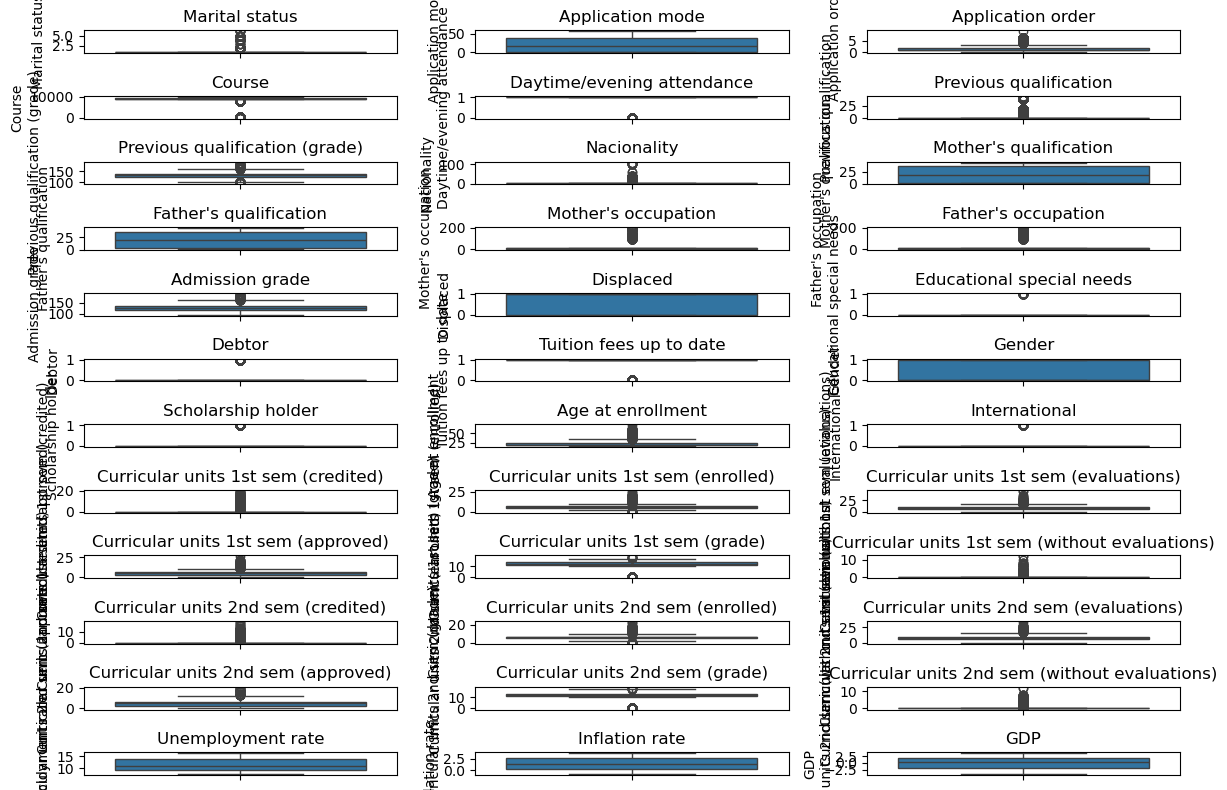

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns for subplots
num_plots = len(num_cols)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust the number of rows based on the number of plots

# Plot box plots for the numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 3, i+1)  # Adjust the layout dynamically
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
# Function to cap outliers based on the 1st and 99th percentiles
def cap_outliers(df, col):
    lower_cap = df[col].quantile(0.01)  # 1st percentile
    upper_cap = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)  # Cap the values
    return df

# List of columns with detected outliers (from your earlier detection)
cols_with_outliers = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Apply the capping to each column with outliers
for col in cols_with_outliers:
    df = cap_outliers(df, col)

# Check if outliers have been handled by checking summary statistics after capping
print(df[cols_with_outliers].describe())

       Admission grade  Curricular units 1st sem (grade)  \
count      4424.000000                       4424.000000   
mean        126.926378                         10.634238   
std          14.186372                          4.835557   
min          99.000000                          0.000000   
25%         117.900000                         11.000000   
50%         126.100000                         12.285714   
75%         134.800000                         13.400000   
max         166.831000                         16.000000   

       Curricular units 2nd sem (grade)  
count                       4424.000000  
mean                          10.224007  
std                            5.203243  
min                            0.000000  
25%                           10.750000  
50%                           12.200000  
75%                           13.333333  
max                           16.000000  


In [12]:
# Check the data types
print(df.dtypes)

# If there are date columns, ensure they are in datetime format
# For example, if there's a 'Date of Enrollment' column:
# df['Date of Enrollment'] = pd.to_datetime(df['Date of Enrollment'], errors='coerce')

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [13]:
# Standardize numerical columns
num_cols = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
            'Unemployment rate', 'Inflation rate', 'GDP']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
# Encode categorical variables, particularly 'Target'
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

# Check the transformed data
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [15]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,-1.965152,0,-0.287638,0.124386,0.765761,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,0.661712,0,0.876222,-1.105222,0.347199,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,-1.965152,0,-0.287638,0.124386,0.765761,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,0.418247,0,-0.813253,-1.466871,-1.375511,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,0.533572,0,0.876222,-1.105222,0.347199,2


In [16]:
# The numerical columns have been successfully scaled using the StandardScaler. The output shows that the selected columns (Admission grade, Unemployment rate, Inflation rate, GDP, Curricular units 1st sem (grade), and Curricular units 2nd sem (grade)) have been transformed, with their values now centered around 0 and scaled to have a standard deviation of 1.

# If you'd like to further verify the scaling, you can check the mean and standard deviation of the scaled columns:
df[num_cols].describe()

,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-6.279887e-16,-4.657717e-17,1.557926e-16,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-1.968758e+00,-2.199424e+00,-1.965152e+00,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-6.363429e-01,7.564871e-02,1.011008e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-5.825810e-02,3.415663e-01,3.798047e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,5.550758e-01,5.720282e-01,5.976422e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,2.813202e+00,1.109773e+00,1.110201e+00,1.739731e+00,1.787974e+00,1.545607e+00


In [17]:
# Save the cleaned and transformed dataset
processed_data_path = '../data/processed/cleaned_data.csv'
df.to_csv(processed_data_path, index=False)